# Number of Visits

In [59]:
# Check the version of MAF - the output should be version 2.4.2 or higher.
# 'unknown' means you're running from a git repo version,
# and have made changes to your local code

import lsst.sims.maf
lsst.sims.maf.__version__

'2.13.0.sims-59-g0a27faef'

In [60]:
# import matplotlib to show plots inline.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [61]:
import healpy as hp

In [62]:
# import our python modules
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles

from lsst.sims.maf.db import ResultsDb

In [63]:
import sys
print(sys.path)

['/Users/dagoret/MacOSX/GitHub/LSST/MyCadence/NumberOfVisits', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/obs_lsst/19.0.0-80-g0bd2bb3+1/python', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/ts_dateloc/master-g60a36c8d46+46/python', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/ts_observatory_model/master-g3d307a5f45+46/python', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_almanac/master-g021b69e146+1/python', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_downtimeModel/master-g55f72efa65+17/python', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_cloudModel/master-ge3724df529+19/python', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_si

### Specify my other python path (my installation)

In [64]:
otherpythonpaths=['/Users/dagoret/anaconda3/lib/python37.zip', '/Users/dagoret/anaconda3/lib/python3.7', '/Users/dagoret/anaconda3/lib/python3.7/lib-dynload', '', '/Users/dagoret/.local/lib/python3.7/site-packages', '/Users/dagoret/anaconda3/lib/python3.7/site-packages', '/Users/dagoret/anaconda3/lib/python3.7/site-packages/aeosa', '/Users/dagoret/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/Users/dagoret/.ipython']

In [65]:
for thepath in otherpythonpaths:
    sys.path.append(thepath) # go to parent dir

In [66]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Config

In [67]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']
colors = {'u': 'cyan', 'g': 'g', 'r': 'y','i': 'r', 'z': 'm', 'y': 'k'}
Nfilt=len(filters)

In [86]:
maxnights=365.25*0.5

In [87]:
all_sqlconstraint=[]
all_bundlename=[]
for f in filters:
    sqlconstraint = 'filter = \"{}\" and night< {}'.format(f,maxnights)
    bundlename    = 'bundSBN_{}'.format(f) 
    all_bundlename.append(bundlename)
    all_sqlconstraint.append(sqlconstraint)
    

In [88]:
all_sqlconstraint

['filter = "u" and night< 182.625',
 'filter = "g" and night< 182.625',
 'filter = "r" and night< 182.625',
 'filter = "i" and night< 182.625',
 'filter = "z" and night< 182.625',
 'filter = "y" and night< 182.625']

In [71]:
all_bundlename

['bundSBN_u', 'bundSBN_g', 'bundSBN_r', 'bundSBN_i', 'bundSBN_z', 'bundSBN_y']

In [72]:
all_bundlename2

[]

# Simu data

In [89]:
# Note the V3 for opening opsim version 3.x databases.
# Use V4 for more recent runs.

#opsdb = db.OpsimDatabase('baseline2018a.db')
opsdb = db.OpsimDatabase('/Users/dagoret/DATA/Cadence/baseline2018a.db')
outDir = 'output_numberofvisits'
resultsDb = db.ResultsDb(outDir=outDir)

# Metrics

In [90]:
# metric = the "maximum" of the "skybrightness" for each group of visits in the slicer
metric = metrics.CountMetric(col='observationStartMJD')

summaryMetrics = [metrics.MinMetric(), metrics.MedianMetric(),
                  metrics.MaxMetric(), metrics.RmsMetric()]


# Slicer

In [91]:
slicer = slicers.HealpixSlicer(nside=64)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


# Bundle

- Bundles dict for all filter

In [93]:
plotDict = {'colorMax': 75}
plotDict = {'colorMin':0, 'colorMax': 40 , 'cbarFormat': '%0.2f'}
# only plot the sky maps for now
plotFuncs = [plots.HealpixSkyMap()]

In [94]:
bundles = {}
for ifilt in np.arange(Nfilt):
    sqlconstraint = all_sqlconstraint[ifilt]
    bundlename    = all_bundlename[ifilt]
    bundles[bundlename] = metricBundles.MetricBundle(metric, slicer, sqlconstraint,summaryMetrics=summaryMetrics)
    print(bundles[bundlename].dbCols)

{'fieldDec', 'fieldRA', 'observationStartMJD'}
{'fieldDec', 'fieldRA', 'observationStartMJD'}
{'fieldDec', 'fieldRA', 'observationStartMJD'}
{'fieldDec', 'fieldRA', 'observationStartMJD'}
{'fieldDec', 'fieldRA', 'observationStartMJD'}
{'fieldDec', 'fieldRA', 'observationStartMJD'}


In [95]:
bgroup = metricBundles.MetricBundleGroup(bundles, opsdb, outDir=outDir,resultsDb=resultsDb)

Querying database SummaryAllProps with constraint filter = "y" and night< 182.625 for columns ['fieldDec', 'fieldRA', 'observationStartMJD']
Found 31840 visits
Running:  ['bundSBN_y']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "i" and night< 182.625 for columns ['fieldDec', 'fieldRA', 'observationStartMJD']
Found 13092 visits
Running:  ['bundSBN_i']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "g" and night< 182.625 for columns ['fieldDec', 'fieldRA', 'observationStartMJD']
Found 8494 visits
Running:  ['bundSBN_g']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "u" and night< 182.625 for columns ['fieldDec', 'fieldRA', 'observationStartMJD']
Found 6731 visits
Running:  ['bu

/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_maf/2.13.0.sims-59-g0a27faef/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 325 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 16.9768  dipole: lon: 99.3587, lat: 20.57, amp: 16.3022
Plotting complete.
Plotting figures with "filter = "i" and night< 182.625" constraint now.


/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_maf/2.13.0.sims-59-g0a27faef/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 612 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 3.07189  dipole: lon: 112.345, lat: -48.5626, amp: 8.76436
Plotting complete.
Plotting figures with "filter = "g" and night< 182.625" constraint now.


/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_maf/2.13.0.sims-59-g0a27faef/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 526 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 3.00042  dipole: lon: 104.935, lat: -44.6719, amp: 3.4934
Plotting complete.
Plotting figures with "filter = "u" and night< 182.625" constraint now.


/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_maf/2.13.0.sims-59-g0a27faef/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 919 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 3.71766  dipole: lon: 53.7189, lat: -1.30141, amp: 2.5796
Plotting complete.
Plotting figures with "filter = "r" and night< 182.625" constraint now.


/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_maf/2.13.0.sims-59-g0a27faef/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 505 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 5.71323  dipole: lon: 109.868, lat: -36.2074, amp: 10.1018
Plotting complete.
Plotting figures with "filter = "z" and night< 182.625" constraint now.


/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_maf/2.13.0.sims-59-g0a27faef/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 400 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 10.4961  dipole: lon: 70.7032, lat: -30.7852, amp: 14.4814
Plotting complete.


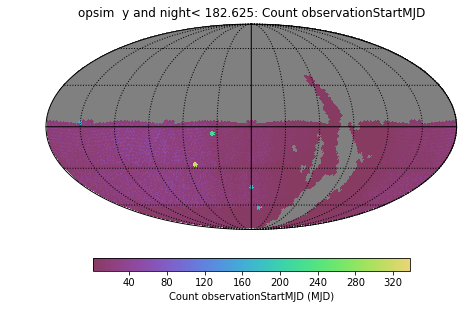

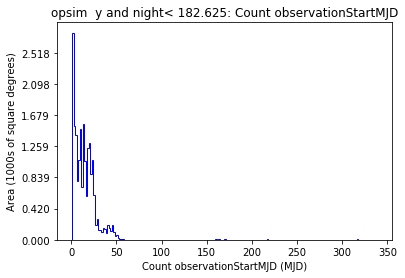

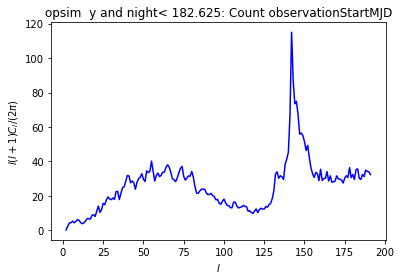

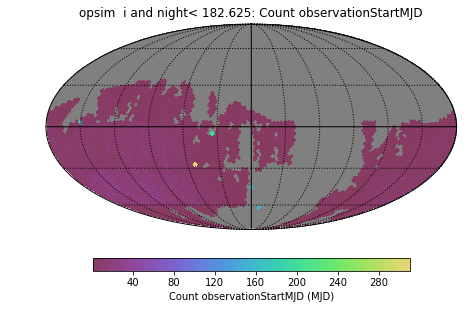

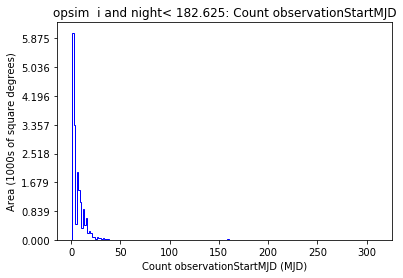

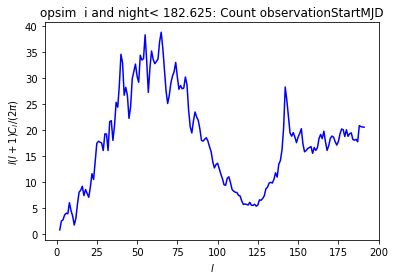

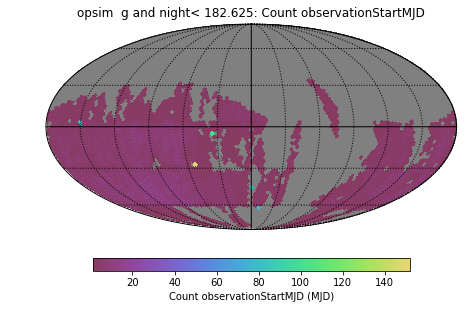

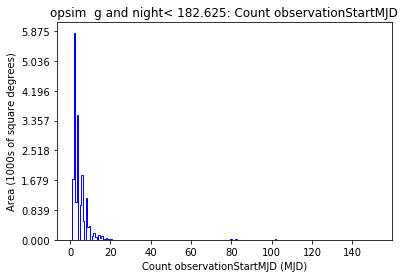

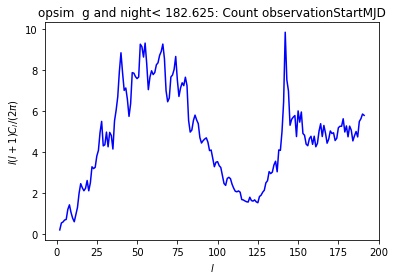

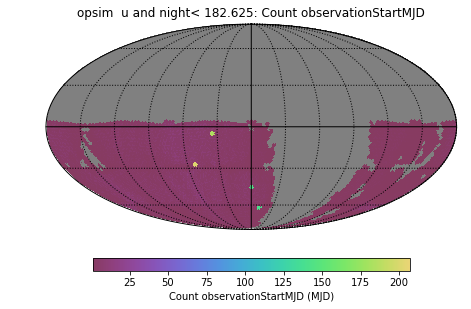

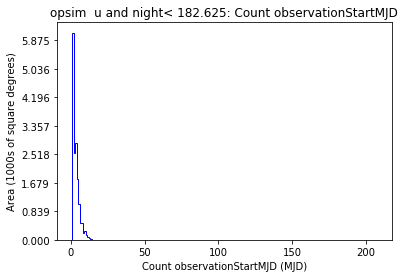

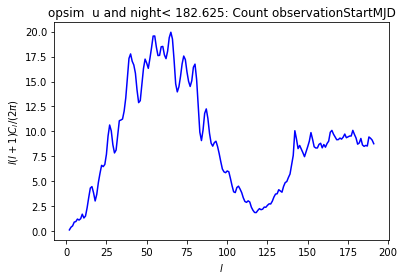

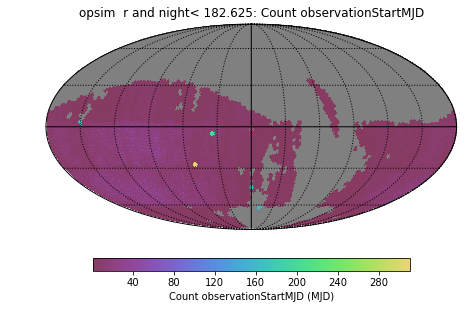

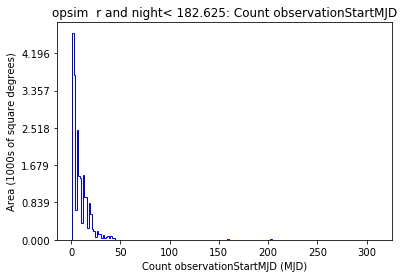

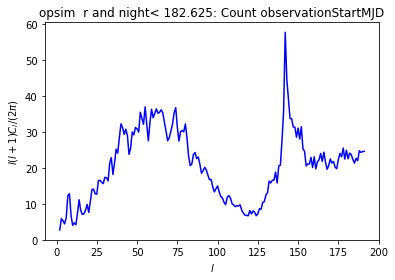

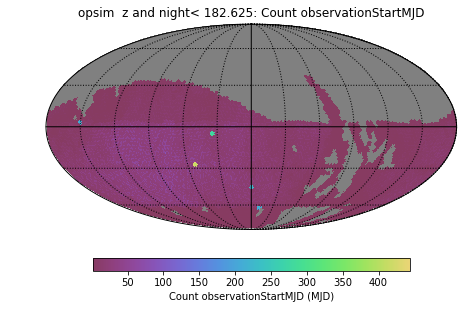

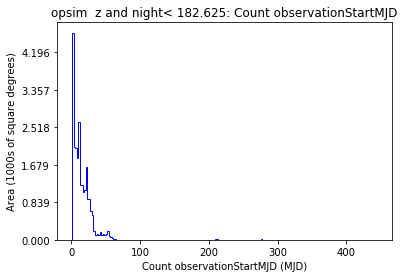

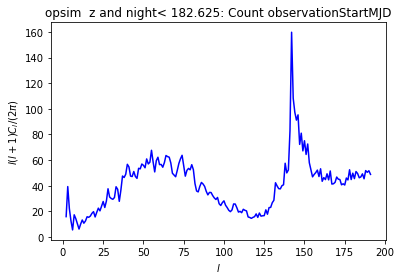

In [96]:
bgroup.runAll()
bgroup.plotAll(closefigs=False)

In [80]:
for ifilt in np.arange(Nfilt):
    
    bundlename    = all_bundlename[ifilt]

    print("===============================",filters[ifilt],"===============================")
    print(bundles[bundlename].dbCols)
    print(len(bundles[bundlename].metricValues))
    print(bundles[bundlename].metricValues[0:200])
    print(bundles[bundlename].summaryValues)
    

=============================== u ===============================
{'fieldDec', 'fieldRA', 'observationStartMJD'}
49152
[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- --]
{'Min': 1.0, 'Median': 11.0, 'Max': 874.0, 'Rms': 32.87981702197742}
=============================== g ===============================
{'fieldDec', 'fieldRA', 'observationStartMJD'}
49152
[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- 

In [81]:
import astroquery
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle

In [82]:
from astroquery.simbad import Simbad
result_table = Simbad.query_object("lmc")
result_table.pprint(show_unit=True)

MAIN_ID      RA        DEC    ... COO_QUAL COO_WAVELENGTH     COO_BIBCODE    
          "h:m:s"    "d:m:s"  ...                                            
-------- ---------- --------- ... -------- -------------- -------------------
NAME LMC 05 23 34.6 -69 45 22 ...        D              O 2003A&A...412...45P


In [83]:
Angle(result_table["RA"][0]+" hour")

<Angle 5.39294444 hourangle>

In [84]:
Angle(result_table["DEC"][0]+" degrees")

<Angle -69.75611111 deg>

In [85]:
SkyCoord(ra=result_table["RA"][0]+"hour",dec=result_table["DEC"][0]+ "degrees")

<SkyCoord (ICRS): (ra, dec) in deg
    (80.89416667, -69.75611111)>